# **GROUP-1 CASE STUDY**

### Problem Statement: 
***To create a model that can classify dataset SMS messages as spam or not spam, based on the training we give to the model.***

### Understanding our dataset:

We will be using a dataset from the UCI Machine Learning repository which has a very good collection of datasets for experimental research purposes. The direct data link is here.

The columns in the data set are currently not named and as you can see, there are 2 columns.

The first column takes two values, 'ham' which signifies that the message is not spam, and 'spam' which signifies that the message is spam.

The second column is the text content of the SMS message that is being classified.

###  Data Preprocessing:


We’ll be using Python and some of its popular data science related packages.

***1.Pandas:*** to read our data from a CSV file and manipulate it for further use.

***2.Numpy:*** to convert out data into a format suitable to feed our classification model.

***3.Seaborn and matplotlib:*** for visualizations.

***4.Ngram:*** A set class that supports lookup by N-gram string similarity

***5.counter*** A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.

In [2]:
!pip install ngram

  Created wheel for ngram: filename=ngram-3.3.2-cp36-none-any.whl size=24680 sha256=d8d839449f6d3a673247815ee3541843fe6b9143cfbb0d97aef261aa58e56515
  Stored in directory: /root/.cache/pip/wheels/7b/d5/5a/6abe3035c83a606376089accde30b021ffb26593f0d6609ef1
Successfully built ngram


In [3]:
!pip install wordcloud

In [0]:
from __future__ import unicode_literals
import os
from ngram import NGram
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Read data from dataset:

In [5]:
df = pd.read_csv('SMSSpamCollection',sep='\t',header=None,names=['Label','sms_message'])
df.head()

,Label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
print(df.shape)

(5572, 2)


In [0]:
df.Label.value_counts()

0    4825
1     747
Name: Label, dtype: int64

* Assign binary value 0 and 1 to label spam and ham so that machine learning model can understand data and give proper output.Our model would be able to make predictions if we left our labels as strings but we could have issues later when calculating performance metrics, for example when calculating our precision and recall scores. Hence, to avoid unexpected 'gotchas' later.

In [6]:
df['Label']=df.Label.map(dict(ham=0,spam=1))
print(df)
print(df.shape)

      Label                                        sms_message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0               Will ü b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[5572 rows x 2 columns]
(5572, 2)


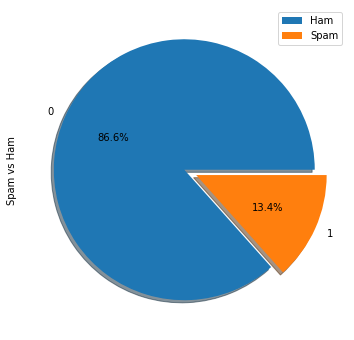

In [7]:
df["Label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [0]:
spam_word = df[df['Label']==1]
spam_word_df=pd.DataFrame(spam_word['sms_message'])

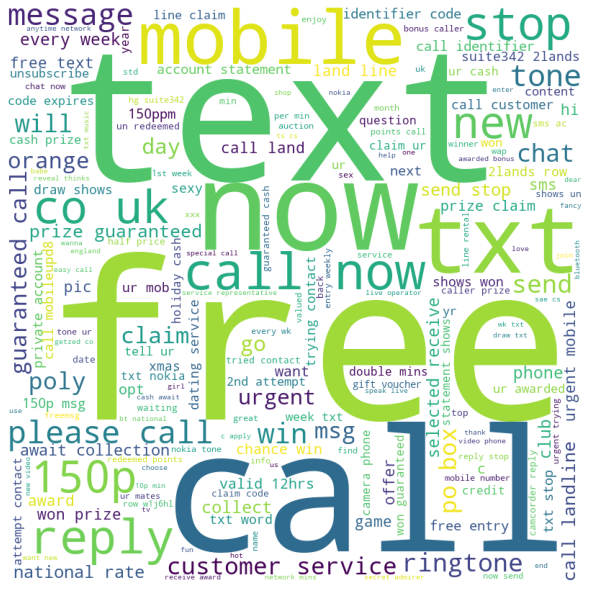

In [11]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
for val in spam_word.sms_message:
    val = str(val)   
    tokens = val.split() 
      
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
wordss=''
for val in spam_word.sms_message:
    val = str(val)   
    tokens = val.split() 
      
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        wordss = wordss + words + ' '

In [0]:
s = wordss.lower()
s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
tokens = [token for token in s.split(" ") if token != ""]
output4 = list(ngrams(tokens, 4))
output3 = list(ngrams(tokens, 3))
output2 = list(ngrams(tokens, 2))


In [14]:
pd.Series(output2).value_counts().head(n=20)

(you, have)       73
(have, won)       54
(your, mobile)    50
(co, uk)          49
(to, claim)       47
(please, call)    46
(this, is)        41
(won, a)          40
(to, contact)     37
(1, 50)           37
(you, are)        36
(t, cs)           33
(u, have)         30
(stop, to)        29
(po, box)         27
(contact, u)      27
(t, c)            27
(cash, or)        27
(find, out)       26
(or, a)           25
dtype: int64

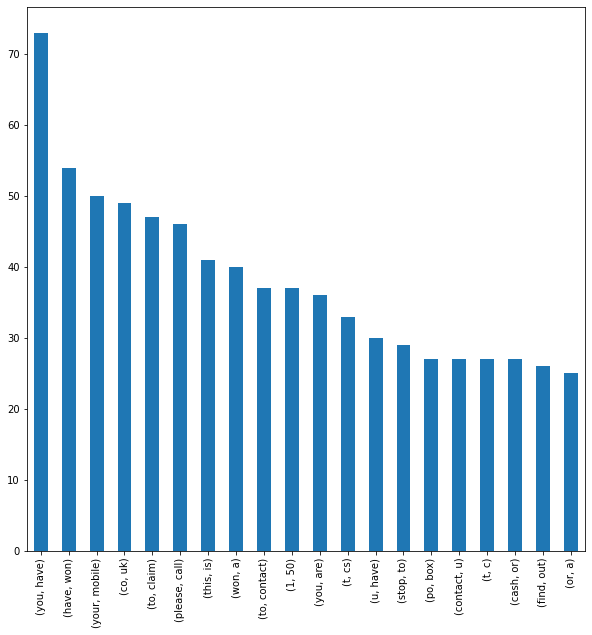

In [15]:
pd.Series(output2).value_counts().head(n=20).plot(kind='bar',figsize = (10,10))

In [16]:
pd.Series(output3).value_counts().head(n=20)

(you, have, won)             37
(have, won, a)               33
(to, contact, u)             21
(prize, guaranteed, call)    21
(1000, cash, or)             19
(urgent, your, mobile)       18
(find, out, who)             18
(from, land, line)           16
(u, have, won)               16
(account, statement, for)    16
(this, is, the)              16
(to, contact, you)           16
(valid, 12hrs, only)         16
(cash, or, a)                15
(trying, to, contact)        15
(suite342, 2lands, row)      15
(is, the, 2nd)               15
(shows, that, you)           14
(are, trying, to)            14
(2nd, attempt, to)           14
dtype: int64

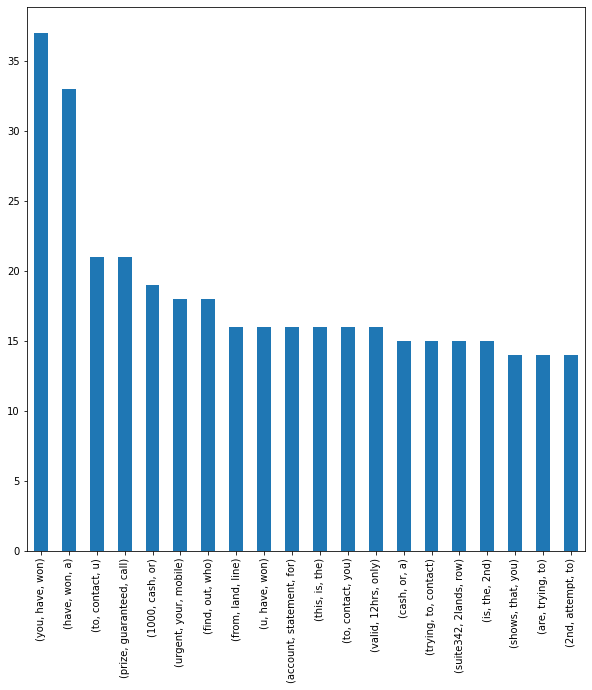

In [17]:
pd.Series(output3).value_counts().head(n=20).plot(kind='bar',figsize = (10,10))

In [18]:
pd.Series(output4).value_counts().head(n=20)

(you, have, won, a)                 31
(this, is, the, 2nd)                15
(we, are, trying, to)               14
(are, trying, to, contact)          14
(draw, shows, that, you)            14
(from, land, line, claim)           14
(have, won, a, guaranteed)          13
(your, 2003, account, statement)    13
(2003, account, statement, for)     13
(private, your, 2003, account)      13
(800, un, redeemed, s)              12
(un, redeemed, s, i)                12
(redeemed, s, i, m)                 12
(shows, that, you, have)            12
(s, i, m, points)                   12
(guaranteed, 1000, cash, or)        12
(that, you, have, won)              12
(shows, 800, un, redeemed)          12
(i, m, points, call)                12
(every, week, just, txt)            11
dtype: int64

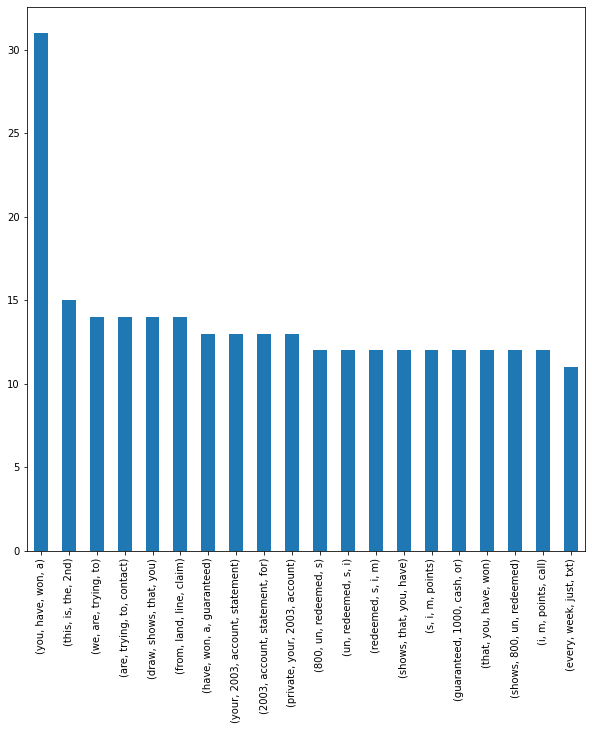

In [19]:
pd.Series(output4).value_counts().head(n=20).plot(kind='bar',figsize = (10,10))

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [0]:
X_train,X_test,y_train,y_test = train_test_split(df['sms_message'],df['Label'],random_state=1)
count_vector = CountVectorizer()
train_data=count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [0]:
clf_abc = AdaBoostClassifier (n_estimators=300,learning_rate = 0.2)

In [31]:
clf_abc.fit(train_data,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=300, random_state=None)

In [0]:
abc_pred = clf_abc.predict(testing_data)

In [0]:
def print_metrics (y_true,preds,model_name=None):
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    else :
        print('Accuracy score'+' '+model_name +':', format(accuracy_score(y_true,preds)))
        print('Precision score'+' ' +model_name +':', format(precision_score(y_true,preds)))
        print('Recall score'+' '+ model_name +':', format(recall_score(y_true, preds)))
        print('F1 score'+' '+model_name +':', format(f1_score(y_true, preds)))
        print('\n\n') 

In [33]:
confusion_matrix(y_test,abc_pred)

array([[1203,    5],
       [  27,  158]])

In [34]:
print_metrics(y_test,abc_pred,'AdaBoost Classifier')

Accuracy score AdaBoost Classifier: 0.9770279971284996
Precision score AdaBoost Classifier: 0.9693251533742331
Recall score AdaBoost Classifier: 0.8540540540540541
F1 score AdaBoost Classifier: 0.9080459770114943





In [36]:
from sklearn.metrics import confusion_matrix

df1=pd.DataFrame(
    confusion_matrix(y_test, predictions),
    columns=['Predicted Not spam', 'Predicted spam'],
    index=['True Not spam', 'True spam']
)
df1

,Predicted Not spam,Predicted spam
True Not spam,1203,5
True spam,11,174


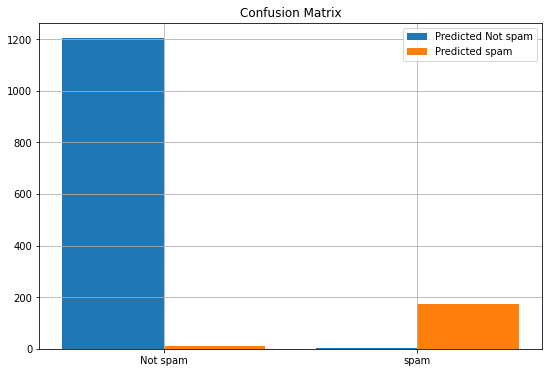

In [37]:
l1=df1.iloc[0]
l3=['Not spam','spam']
l2=df1.iloc[1]
xpos=np.arange(len(l3))

plt.figure(figsize=(9,6))
plt.bar(xpos-0.2,l1,width=0.4,label='Predicted Not spam')
plt.bar(xpos+0.2,l2,width=0.4,label='Predicted spam')
plt.xticks(xpos,l3)
plt.legend()
plt.grid()
plt.title('Confusion Matrix')
plt.show()

